In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## `1.1 Describing Dataset, splitting, Normalizing and Standardizing`

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

<Axes: >

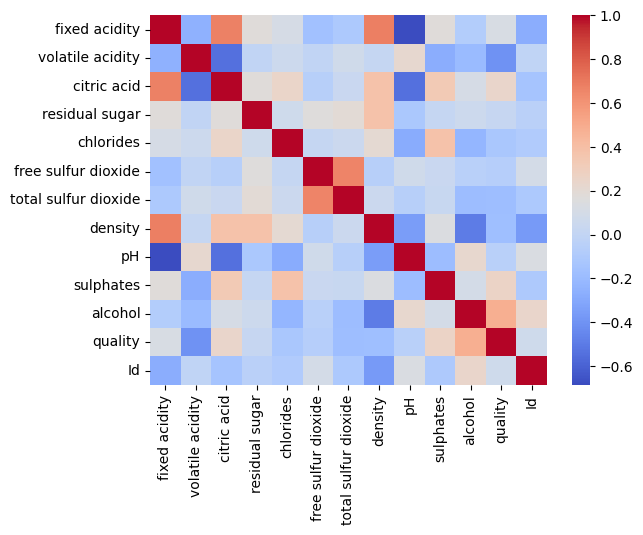

In [25]:
data = pd.read_csv('WineQT.csv')


print(data.describe())

cov_matrix = data.corr()
print(cov_matrix)
sns.heatmap(cov_matrix, cmap='coolwarm')

In [26]:
data = pd.read_csv('WineQT.csv')

labels = pd.DataFrame(data.quality-3)

data = data.drop(columns=['quality', 'Id'], axis=1)

print(labels,data)

      quality
0           2
1           2
2           2
3           3
4           2
...       ...
1138        3
1139        3
1140        2
1141        3
1142        2

[1143 rows x 1 columns]       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090 

In [27]:
X_train , X_test , y_train , y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [28]:

def standardize(data):
    data = (data - data.mean())/data.std()
    return data

In [29]:
X_train = standardize(X_train)
X_test = standardize(X_test)
# # print(X_train.mean())
# # print(X_test.mean())

## `1.2 Creating Multinomial Logistic Regression model` 

In [30]:
class multinomial_logistic_reg():
    def fit(self, data, labels, learning_rate,epochs=1000):

        #convertign dataframe of values to array
        self.data = pd.DataFrame.to_numpy(data)
        #onehot encoding for labels
        encoder = OneHotEncoder(sparse_output=False)
        self.labels = encoder.fit_transform(labels)
        self.weight = np.zeros((self.labels.shape[1] , self.data.shape[1])) #in this case (3,13)

        loss = [] # Setup loss values list
    
        for ep in range(epochs):
            
            Loss = self.CELoss() # Compute the loss value
            print('Loss is: ' + str(Loss)) # Print the loss for visualization
            loss.append(Loss) # Append loss to the loss values list
            
            prm = np.random.permutation(self.data.shape[0]) # Initialize the "stochastic"
            for i in prm:            
                soft = self.soft_max(self.score(self.weight, self.data[i])) # Softmax
                gradient = self.sgd(soft - self.labels[i], self.data[i]) # Stochastic gradient descent
                self.weight = self.weight - learning_rate * gradient # Update weight value
                
        return self.weight, loss # Return the optimized weights and the loss values for visualization


    def score(self, we, ele):
        return we @ ele
    
    def soft_max(self, pre_score):
        return np.exp(pre_score) / np.sum(np.exp(pre_score))
    
    def CELoss(self): # Cross-entropy loss
        L = 0 # Define loss
        for i in range(self.data.shape[0]): # Iterate through X
            soft = self.soft_max(self.score(self.weight, self.data[i])) # Softmax
            L -= np.vdot(self.labels[i],np.log(soft)) # Cross Entropy Loss
        return L

    def sgd(self,a, b): # Stochastic gradient descent
        return np.outer(a, b)


In [ ]:
obj = multinomial_logistic_reg()
w, loss = obj.fit(X_train, y_train, 0.01)

# X_test = np.insert(X_test,  axis=1) #add constant
X_test = pd.DataFrame.to_numpy(X_test)
print(y_test.values.T[0])
y_test = y_test.values.T[0]
predictions = [] #define a prediction list
for x in range(X_test.shape[0]): #iterate through X
    soft = obj.soft_max(obj.score(w, X_test[x])) #softmax
    prob = np.argmax(soft) #find the index with maximum probability
    predictions.append(prob) #add the final prediction to the list
print(predictions)
# print(y_test.data)
accuracy = np.count_nonzero(pd.Series(predictions) == pd.Series(y_test)) / len(predictions)
print("Our test accuracy is ", accuracy)

[2 3 2 3 3 5 2 2 3 2 4 3 3 3 2 3 2 2 2 3 3 3 2 4 3 2 4 3 2 3 3 3 3 2 3 2 3
 4 3 2 4 2 3 2 1 2 3 3 2 3 4 2 3 4 2 4 3 1 3 2 2 3 2 3 3 3 3 2 2 2 3 2 3 3
 2 2 2 2 2 3 2 3 2 3 3 3 3 2 3 3 2 2 3 2 2 2 3 4 3 3 4 3 2 3 2 2 3 4 3 4 4
 2 2 2 3 2 2 5 3 2 2 2 2 3 2 3 3 3 3 3 2 2 4 3 2 2 2 3 2 3 4 3 3 2 4 2 2 2
 2 2 4 3 3 2 3 3 2 2 4 2 2 2 3 2 4 2 3 1 3 2 3 2 2 3 2 2 4 2 3 3 3 2 3 3 2
 1 3 2 3 1 3 3 4 3 2 3 2 4 4 3 3 3 2 2 4 4 2 2 3 3 2 3 3 3 2 3 4 2 3 3 3 2
 2 2 1 3 2 3 3]
[2, 2, 2, 2, 3, 4, 2, 2, 3, 2, 4, 4, 2, 4, 3, 2, 2, 3, 2, 3, 3, 4, 2, 3, 2, 2, 4, 3, 2, 3, 4, 3, 4, 3, 2, 2, 2, 4, 4, 4, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 4, 2, 3, 4, 3, 4, 2, 3, 4, 2, 2, 3, 0, 4, 4, 2, 3, 2, 2, 3, 2, 2, 5, 3, 2, 2, 3, 3, 2, 2, 2, 3, 4, 2, 2, 4, 1, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 4, 2, 2, 2, 4, 3, 2, 2, 2, 2, 4, 2, 3, 3, 3, 2, 3, 2, 2, 4, 3, 4, 2, 2, 2, 1, 3, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 2, 4, 2, 3, 3, 2, 3, 4, 3, 4, 2, 3, 3, 3, 2, 4, 3, 3, 2, 4, 3, 2, 2, 2, 2, 4, 3,

## `1.3 Training the model along with Hyperparameter Tuning and Evaluation`

In [31]:
import wandb

wandb.init(project='SAMI-Ass3-1', entity='aryamarda')

# Define a function for training and evaluating the model
def train_and_evaluate(learning_rate, epochs):
    obj = multinomial_logistic_reg()
    w, loss = obj.fit(X_train, y_train, learning_rate=learning_rate, epochs=epochs)

    # Evaluation on the test set
    X_test2 = pd.DataFrame.to_numpy(X_test)
    y_test2 = y_test.values.T[0]
    predictions = []
    for x in range(X_test2.shape[0]):
        soft = obj.soft_max(obj.score(w, X_test2[x]))
        prob = np.argmax(soft)
        predictions.append(prob)
    
    accuracy = np.count_nonzero(pd.Series(predictions) == pd.Series(y_test2)) / len(predictions)
    print(f"Accuracy with LR={learning_rate}, Epochs={epochs}: {accuracy}")

    # Log the metrics with wandb
    wandb.log({"learning_rate": learning_rate, "epochs": epochs, "accuracy": accuracy})

# Hyperparameter tuning
learning_rates = [0.001, 0.01, 0.1]
epochs_list = [100, 500, 1000]

for lr in learning_rates:
    for epochs in epochs_list:
        train_and_evaluate(learning_rate=lr, epochs=epochs)

# Finish the wandb run
wandb.finish()

Loss is: 1637.668154874442
Loss is: 1528.0992568129286
Loss is: 1462.2352387170733
Loss is: 1420.2566826094908
Loss is: 1392.3862893174057
Loss is: 1373.0536607346364
Loss is: 1359.3317911246602
Loss is: 1349.0380208172176
Loss is: 1341.164640717807
Loss is: 1335.07686356613
Loss is: 1330.1888111990788
Loss is: 1326.2671029109906
Loss is: 1322.9387800518925
Loss is: 1320.19638763068
Loss is: 1317.8671034390359
Loss is: 1315.867473155222
Loss is: 1314.1518592990785
Loss is: 1312.598160879004
Loss is: 1311.2252391414675
Loss is: 1310.0170011951948
Loss is: 1308.9149043267596
Loss is: 1307.9027736728472
Loss is: 1306.968908948337
Loss is: 1306.1363306814264
Loss is: 1305.376356686696
Loss is: 1304.6516480990795
Loss is: 1304.0109604342442
Loss is: 1303.3809875297777
Loss is: 1302.7878627659027
Loss is: 1302.2420508021921
Loss is: 1301.7639136307157
Loss is: 1301.2619642344662
Loss is: 1300.8061277590416
Loss is: 1300.3844076258079
Loss is: 1300.015025704833
Loss is: 1299.6127681047792
Los

accuracy,█▇▆▆▇▆▃▁▆
epochs,▁▄█▁▄█▁▄█
learning_rate,▁▁▁▂▂▂███
accuracy,0.56332
epochs,1000
learning_rate,0.1
